# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
# Explorando o DataFrame
df.describe()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
count,15000.000000,15000.000000,15000.000000,15000.00000,12466.000000,15000.000000,15000.000000
mean,7499.500000,8298.753467,0.437267,43.84140,7.750462,2.219067,4624.632946
std,4330.271354,4800.904442,0.760594,11.22917,6.780216,0.922352,4628.571729
min,0.000000,0.000000,0.000000,22.00000,0.191781,1.000000,159.900000
25%,3749.750000,4111.750000,0.000000,34.00000,3.016438,2.000000,1945.740000
50%,7499.500000,8330.500000,0.000000,43.00000,6.016438,2.000000,3278.260000
75%,11249.250000,12469.000000,1.000000,53.00000,10.183562,3.000000,5642.365000
max,14999.000000,16649.000000,14.000000,68.00000,42.906849,15.000000,89918.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
# Criei outro dataframe com as variaveis quantitativas
var_quantitativas = df[['qtd_filhos','idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
var_quantitativas

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37
...,...,...,...,...,...
14995,1,37,2.046575,3.0,1193.29
14996,1,30,12.079452,3.0,2519.18
14997,0,40,2.161644,2.0,1586.85
14998,0,47,3.295890,2.0,6975.39


In [6]:
corr_matrix = var_quantitativas.corr()
corr_matrix

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


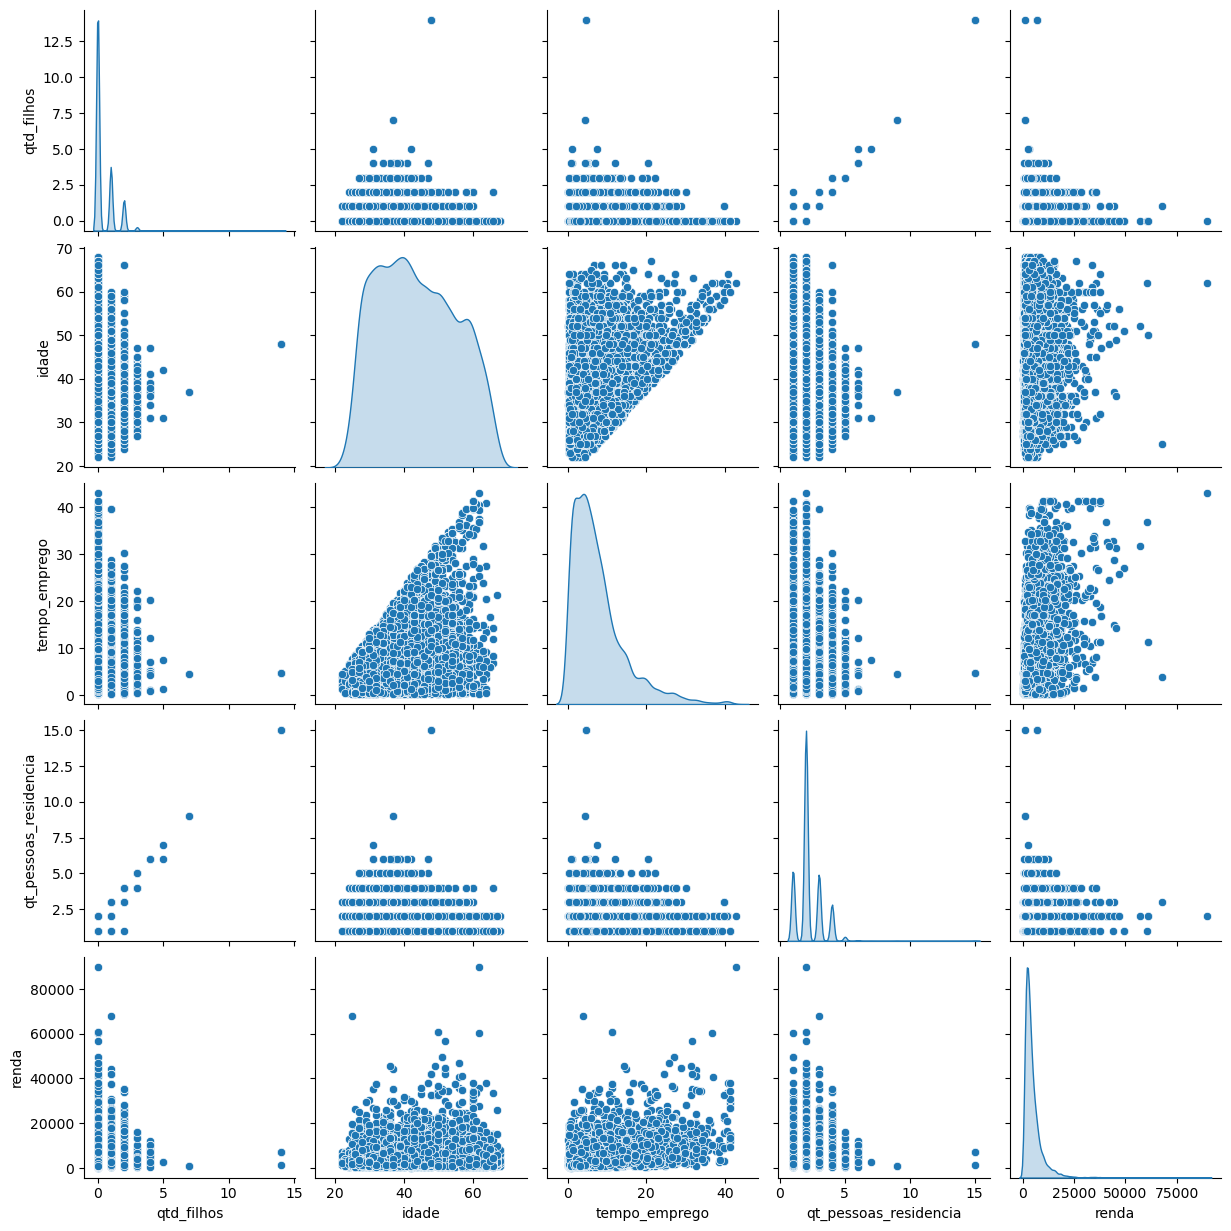

In [7]:
sns.pairplot(var_quantitativas, diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Matriz de Correlacao da Variavel Renda')

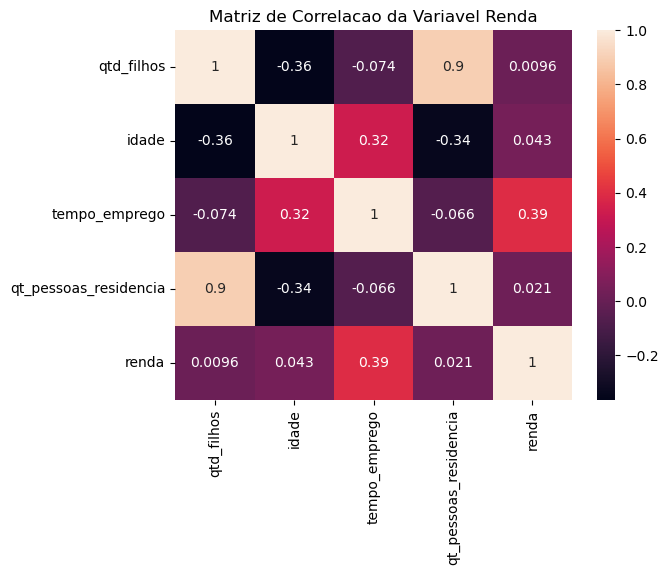

In [8]:
sns.heatmap(corr_matrix, annot=True);
plt.title('Matriz de Correlacao da Variavel Renda')

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

,x,y
x,1.000000,0.394235
y,0.394235,1.000000


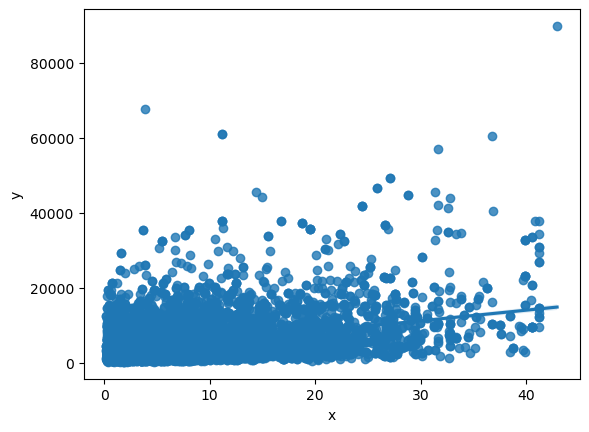

In [17]:
# As duas variaveis mais correlacionadas com renda sao a 'tempo_emprego' e 'idade'
x= var_quantitativas['tempo_emprego']
y= var_quantitativas['renda']

df1= pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data=df1)
df1.corr()

,x,y
x,1.00000,0.04257
y,0.04257,1.00000


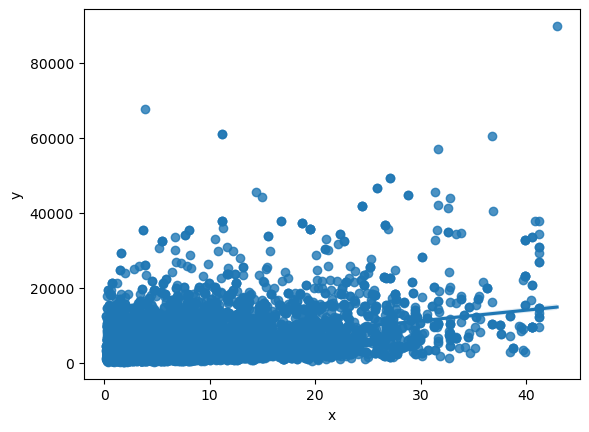

In [10]:
x= var_quantitativas['idade']
y= var_quantitativas['renda']

df2= pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data=df1)
df2.corr()

3) Na sua opinião, há outliers na variável renda?

Sim, há outliers na variavel renda pois existem pontos muito afastados que nao seguem o padrao.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [11]:
# Calculei o logaritmo da variavel renda e criei uma nova coluna no dataframe
var_quantitativas_log = var_quantitativas.copy()
var_quantitativas_log['log_renda'] = np.log(var_quantitativas_log['renda'])
var_quantitativas_log.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,1,36,3.575342,3.0,3369.24,8.122442
1,0,42,0.860274,2.0,6096.14,8.715411
2,2,31,8.065753,4.0,5658.98,8.640999
3,0,50,1.208219,2.0,7246.69,8.888300
4,0,52,13.873973,2.0,4017.37,8.298383


In [12]:
# Matriz de correlacao usando o logaritmo da renda
corr_matrix_log = var_quantitativas_log.corr()
corr_matrix_log

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


Text(0.5, 1.0, 'Matriz de Correlacao com Logaritmo de Renda')

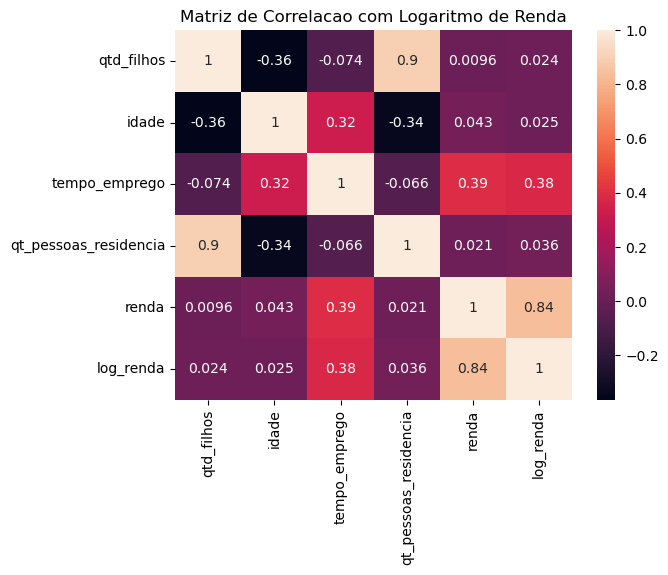

In [13]:
sns.heatmap(corr_matrix_log, annot=True);
plt.title('Matriz de Correlacao com Logaritmo de Renda')

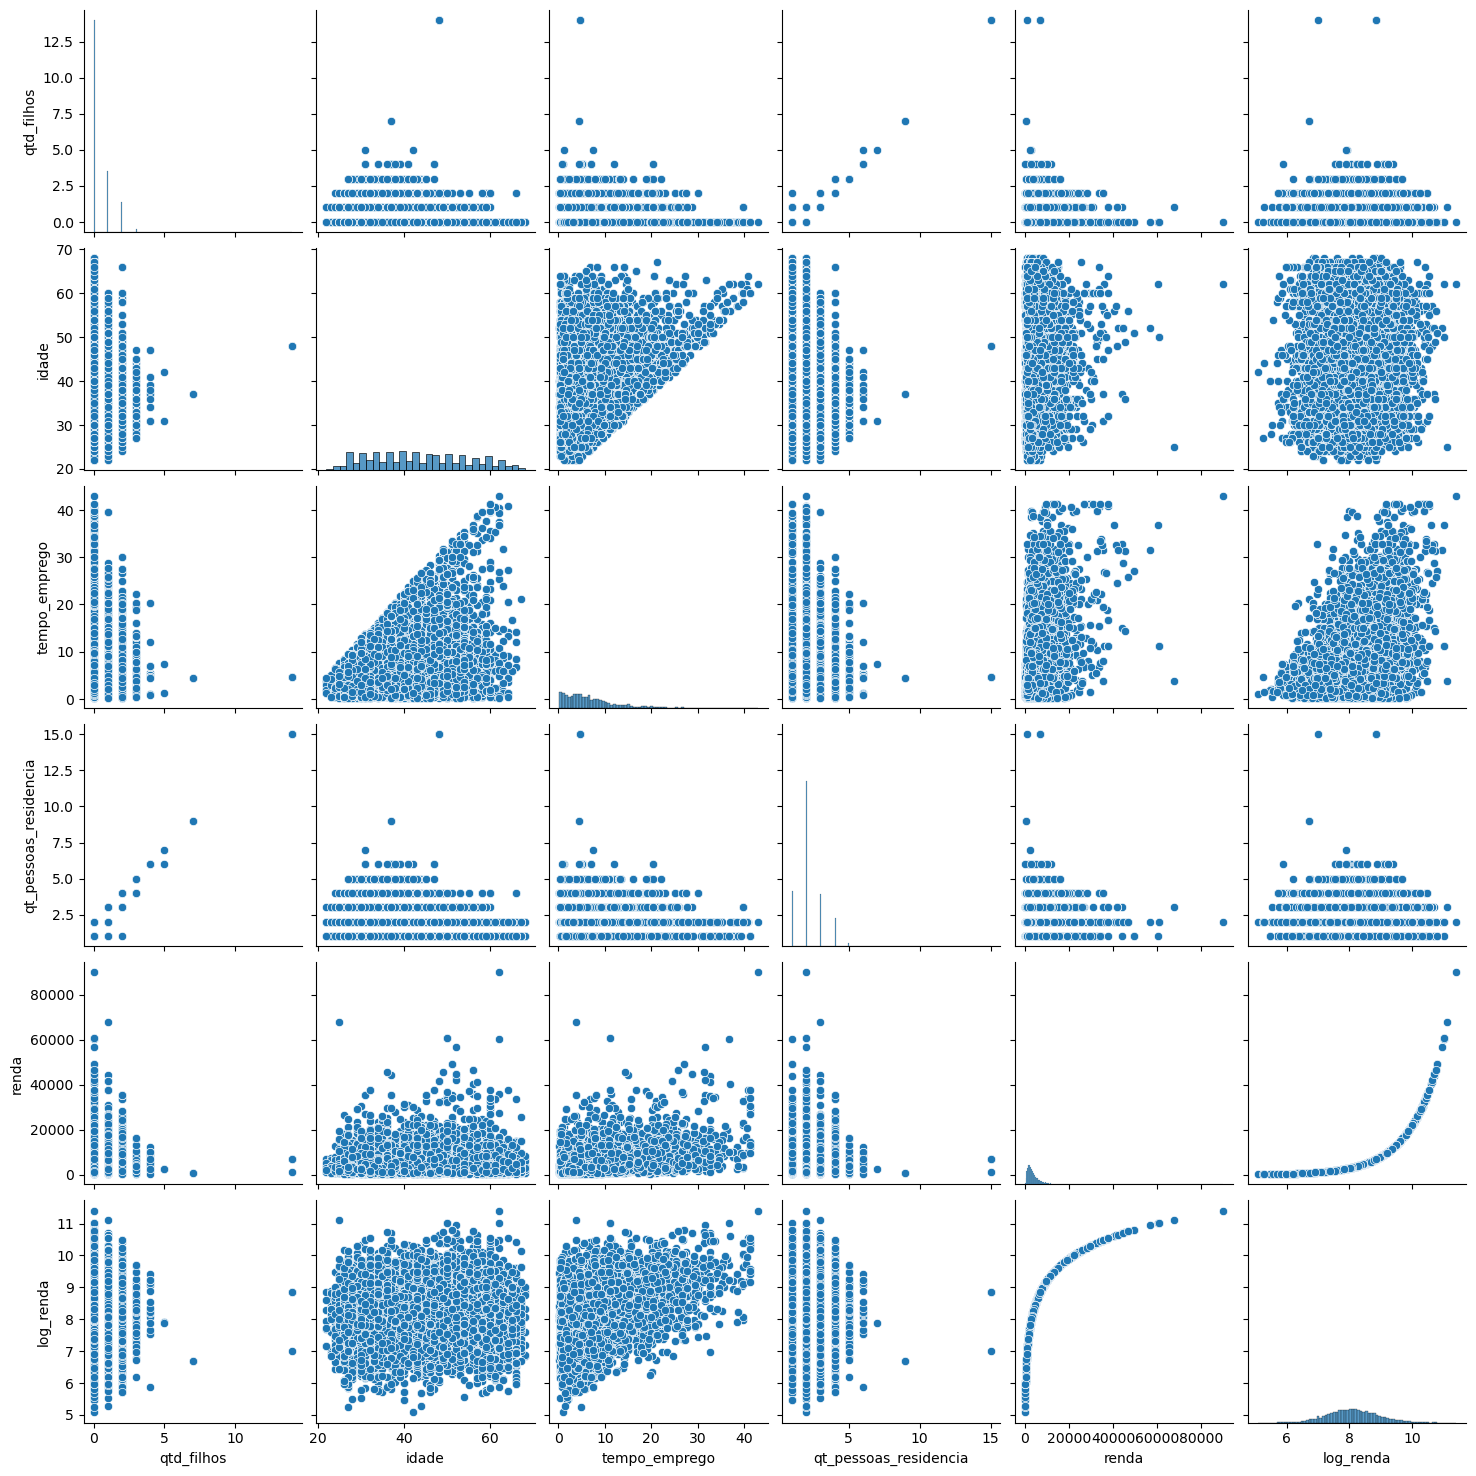

In [14]:
# Matriz de dispersao com o logaritmo renda
sns.pairplot(var_quantitativas_log)
plt.show()

,x,y
x,1.000000,0.379556
y,0.379556,1.000000


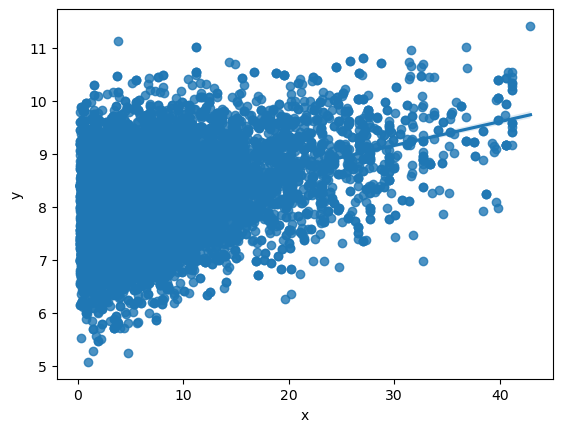

In [15]:
x= var_quantitativas_log['tempo_emprego']
y= var_quantitativas_log['log_renda']

df1= pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data=df1)
df1.corr()

,x,y
x,1.000000,0.024712
y,0.024712,1.000000


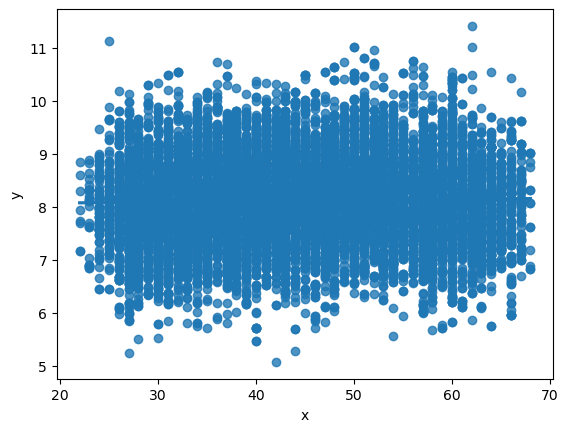

In [16]:
x= var_quantitativas_log['idade']
y= var_quantitativas_log['log_renda']

df2= pd.DataFrame({'x':x, 'y':y})

_ = sns.regplot(x='x', y='y', data=df2)
df2.corr()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Apenas na variavel 'tempo_emprego' melhorou a analise pois a correlacao entre ele o o 'log_renda' é um pouco mais forte que a 'renda'. As correlacao das demais variaveis 'qtd_filhos', 'idade' e 'qt_pessoas_residencia1' permaneceu baixa apos transformação.